<a href="https://colab.research.google.com/github/sshah34/Python-Projects/blob/main/Image_Classifier_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:33<00:00, 31.7MB/s]
100% 1.06G/1.06G [00:33<00:00, 34.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalization

def normal(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(normal)
test_ds = test_ds.map(normal)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,518,273 (120.23 MB)

 Trainable params: 31,518,081 (120.23 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 81ms/step - accuracy: 0.5584 - loss: 4.7811 - val_accuracy: 0.6342 - val_loss: 0.6892
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.6493 - loss: 0.6295 - val_accuracy: 0.7310 - val_loss: 0.5592
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 100ms/step - accuracy: 0.7090 - loss: 0.5729 - val_accuracy: 0.5628 - val_loss: 0.7196
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 81ms/step - accuracy: 0.6577 - loss: 0.6694 - val_accuracy: 0.6824 - val_loss: 0.5518
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7609 - loss: 0.4931 - val_accuracy: 0.7228 - val_loss: 0.5623
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.7984 - loss: 0.4313 - val_accuracy: 0.7004 - val_loss: 0.5860
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8326 - loss: 0.3654 - val_accuracy: 0.7906 - val_loss: 0.4748
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.8825 - loss: 0.2766 -

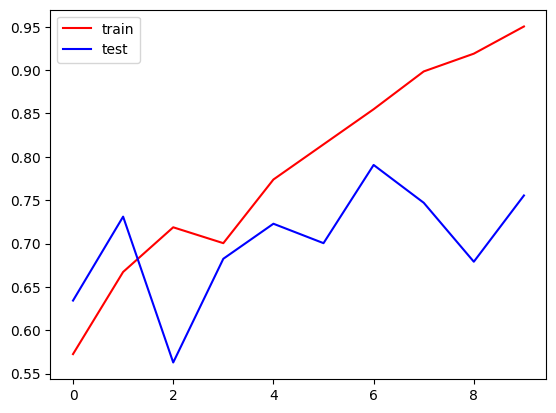

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'], color = 'red', label='train')
plt.plot(model.history.history['val_accuracy'], color = 'blue', label='test')
plt.legend()
plt.show()

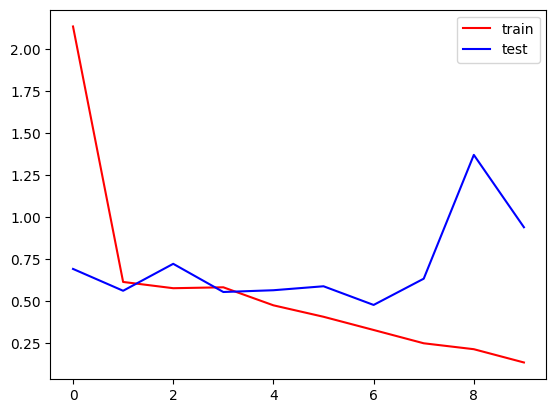

In [ ]:
plt.plot(model.history.history['loss'], color = 'red', label='train')
plt.plot(model.history.history['val_loss'], color = 'blue', label='test')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

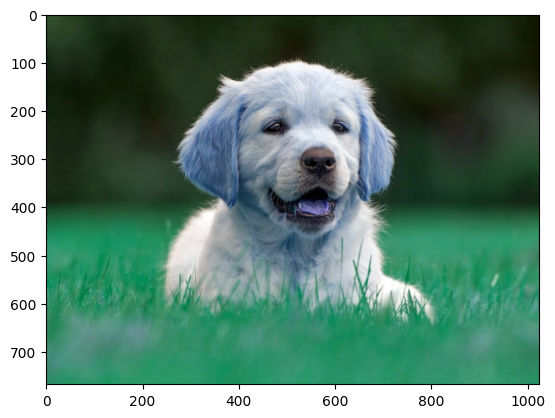

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(768, 1024, 3)

In [ ]:
test_img = cv2.resize(test_img, (256,256))

In [ ]:
test_img = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

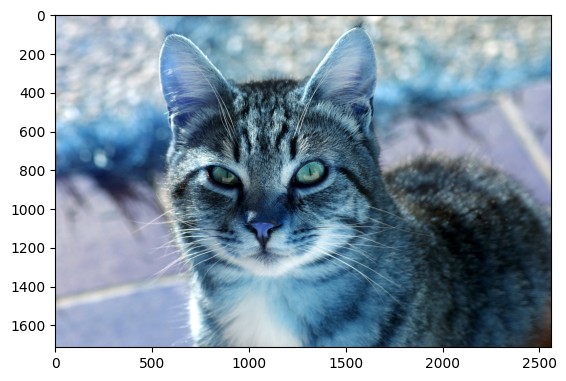

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img, (256,256))

In [ ]:
test_img = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.]], dtype=float32)